**Question 1**

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

import __main__

## **Load Dataset**

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1HD99679NQbMNsOCFkV1uAxF13ikNM17L
# https://drive.google.com/file/d/1HD99679NQbMNsOCFkV1uAxF13ikNM17L/view?usp=sharing

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1HD99679NQbMNsOCFkV1uAxF13ikNM17L
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 46.0MB/s]


## **Neuron (from Scratch)**

### **Activation Function**

In [3]:
def relu(x):
    return np.maximum(0, x)

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def tanh(x):
    return np.tanh(x)

### **Loss**

In [6]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [7]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### **Accuracy**

In [8]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### **Neuron**

In [9]:
class Neuron:

    def __init__(self, in_features, threshold, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.threshold = threshold
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad = None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def decision_function(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.threshold
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)

    def gradient_descent(self):
        self.w -= self.eta * self.threshold

    def __repr__(self):
        af_name = self.af.__name__ if self.af is not None else None
        loss_fn_name = self.loss_fn.__name__ if self.loss_fn is not None else None
        return f'Neuron({self.in_features}, {self.threshold}, {af_name}, {loss_fn_name}, {self.n_iter}, {self.eta}, {self.verbose})'

    def parameters(self):
        return {'w': self.w, 'threshold': self.threshold}

# **Part 1**

## **Train**

In [10]:
# Load the dataset
data = pd.read_csv('/content/Perceptron.csv')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Transforming y values from {-1, 1} to {0, 1}
y = np.where(y == -1, 0, 1)

# Display the dimensions of the dataset
print(f'Dimensions of the features: {X.shape}')
print(f'Dimensions of the target: {y.shape}')

Dimensions of the features: (400, 2)
Dimensions of the target: (400,)


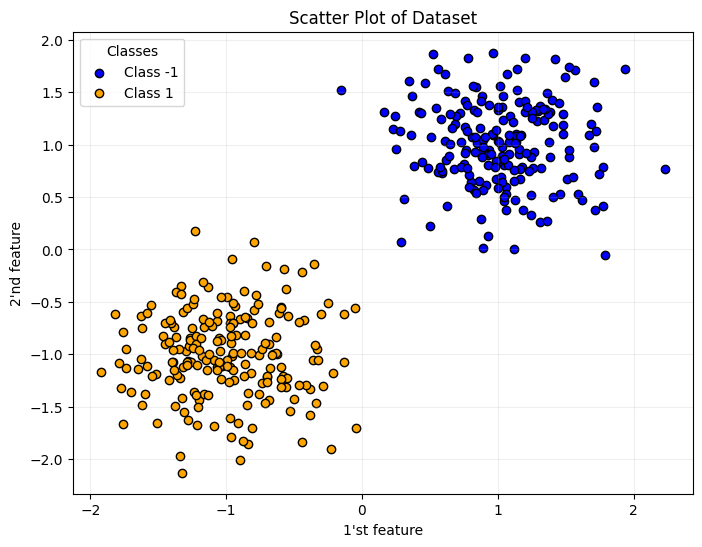

In [11]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
scatter_class_0 = plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class -1', edgecolors='k', marker='o')
scatter_class_1 = plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Class 1', edgecolors='k', marker='o')
plt.xlabel("1'st feature")
plt.ylabel("2'nd feature")
plt.title('Scatter Plot of Dataset')  # Title for the plot
plt.legend(handles=[scatter_class_0, scatter_class_1], title='Classes',loc="upper left")
plt.grid(alpha=0.2)  # Display grid lines

In [12]:
# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, stratify=y, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {X_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {X_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')

Dimensions of the training features: (320, 2)
Dimensions of the training target: (320,)
Dimensions of the testing features: (80, 2)
Dimensions of the testing target: (80,)


In [13]:
neuron = Neuron(in_features=2, threshold=0.1, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(X_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')

Iter=0, Loss=1.316
Iter=10, Loss=1.17
Iter=20, Loss=1.033
Iter=30, Loss=0.9064
Iter=40, Loss=0.7899
Iter=50, Loss=0.6842
Iter=60, Loss=0.5894
Iter=70, Loss=0.5054
Iter=80, Loss=0.4318
Iter=90, Loss=0.3678
Iter=100, Loss=0.3126
Iter=110, Loss=0.2653
Iter=120, Loss=0.225
Iter=130, Loss=0.1908
Iter=140, Loss=0.1619
Iter=150, Loss=0.1375
Iter=160, Loss=0.1169
Iter=170, Loss=0.0995
Iter=180, Loss=0.08486
Iter=190, Loss=0.0725
Iter=200, Loss=0.06208
Iter=210, Loss=0.05327
Iter=220, Loss=0.04581
Iter=230, Loss=0.0395
Iter=240, Loss=0.03414
Iter=250, Loss=0.02958
Iter=260, Loss=0.0257
Iter=270, Loss=0.02238
Iter=280, Loss=0.01954
Iter=290, Loss=0.01711
Iter=300, Loss=0.01502
Iter=310, Loss=0.01322
Iter=320, Loss=0.01166
Iter=330, Loss=0.01032
Iter=340, Loss=0.009148
Iter=350, Loss=0.008132
Iter=360, Loss=0.007246
Iter=370, Loss=0.006471
Iter=380, Loss=0.005793
Iter=390, Loss=0.005197
Iter=400, Loss=0.004673
Iter=410, Loss=0.00421
Iter=420, Loss=0.003801
Iter=430, Loss=0.003438
Iter=440, Loss=0

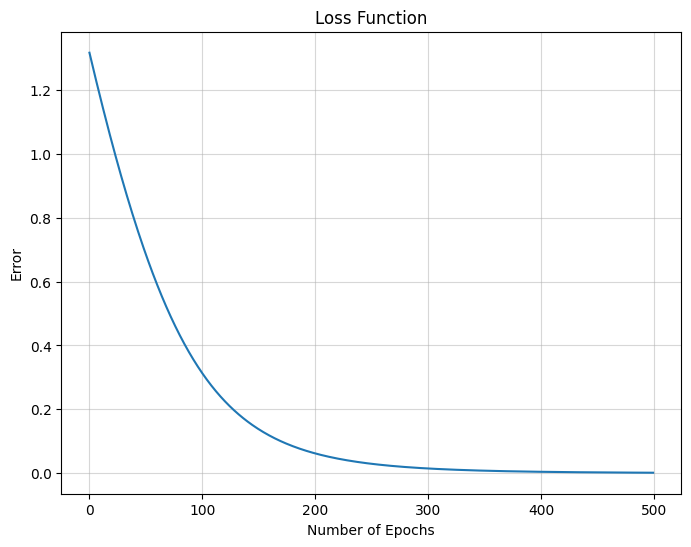

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

# **Part 2**

## **Evaluation**

In [15]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [16]:
y_hat[:, 0], y_test

(array([1.05713470e-06, 3.60896103e-04, 1.25585410e-04, 9.99990750e-01,
        2.88291613e-04, 1.84127685e-01, 9.99999816e-01, 3.68706032e-05,
        4.28322161e-02, 9.98909840e-01, 3.01965016e-04, 1.81388726e-05,
        9.99973045e-01, 2.72748544e-04, 6.54687867e-04, 9.99629709e-01,
        9.99932308e-01, 6.37628767e-03, 9.99489436e-01, 4.06042459e-06,
        9.99786936e-01, 9.99957193e-01, 9.93838673e-01, 1.32939331e-05,
        1.97982008e-05, 9.99446756e-01, 2.83212767e-04, 9.99998198e-01,
        9.94675822e-01, 9.99986067e-01, 9.99528002e-01, 4.13951555e-05,
        1.67354849e-04, 1.37586095e-03, 9.99837102e-01, 1.17586142e-03,
        9.86630142e-01, 9.99975277e-01, 9.99741354e-01, 9.99435326e-01,
        1.02757919e-03, 9.99990180e-01, 9.99645456e-01, 9.99912897e-01,
        9.99442622e-01, 9.99927937e-01, 6.21634314e-06, 9.90369524e-01,
        1.13672353e-06, 1.39459306e-05, 9.94919029e-01, 4.50504168e-04,
        9.36061019e-04, 9.99996318e-01, 1.11931669e-02, 9.575727

## **Plot**

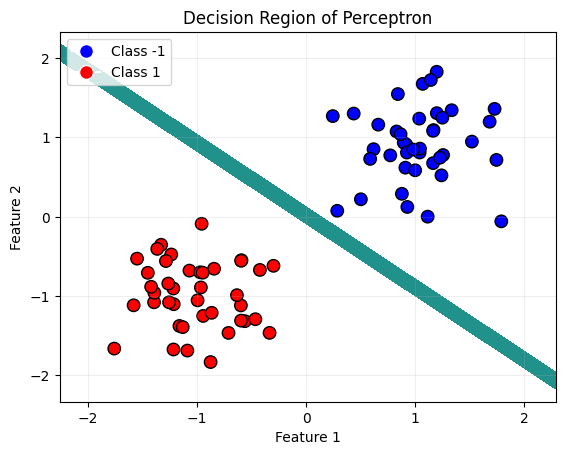

In [17]:
# Define the range of values for x1 and x2
x1_min, x2_min = X_test.min(0) - 0.5
x1_max, x2_max = X_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()


# **Part 3**

## **changing bias to 0.008**

In [33]:
neuron = Neuron(in_features=2, threshold=0.008, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(X_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')

Iter=0, Loss=0.6575
Iter=10, Loss=0.65
Iter=20, Loss=0.6426
Iter=30, Loss=0.6353
Iter=40, Loss=0.628
Iter=50, Loss=0.6207
Iter=60, Loss=0.6136
Iter=70, Loss=0.6065
Iter=80, Loss=0.5994
Iter=90, Loss=0.5925
Iter=100, Loss=0.5856
Iter=110, Loss=0.5787
Iter=120, Loss=0.572
Iter=130, Loss=0.5653
Iter=140, Loss=0.5586
Iter=150, Loss=0.552
Iter=160, Loss=0.5455
Iter=170, Loss=0.5391
Iter=180, Loss=0.5327
Iter=190, Loss=0.5263
Iter=200, Loss=0.5201
Iter=210, Loss=0.5139
Iter=220, Loss=0.5077
Iter=230, Loss=0.5016
Iter=240, Loss=0.4956
Iter=250, Loss=0.4897
Iter=260, Loss=0.4838
Iter=270, Loss=0.4779
Iter=280, Loss=0.4721
Iter=290, Loss=0.4664
Iter=300, Loss=0.4608
Iter=310, Loss=0.4552
Iter=320, Loss=0.4496
Iter=330, Loss=0.4442
Iter=340, Loss=0.4387
Iter=350, Loss=0.4334
Iter=360, Loss=0.4281
Iter=370, Loss=0.4228
Iter=380, Loss=0.4176
Iter=390, Loss=0.4125
Iter=400, Loss=0.4074
Iter=410, Loss=0.4024
Iter=420, Loss=0.3974
Iter=430, Loss=0.3925
Iter=440, Loss=0.3876
Iter=450, Loss=0.3828
Iter

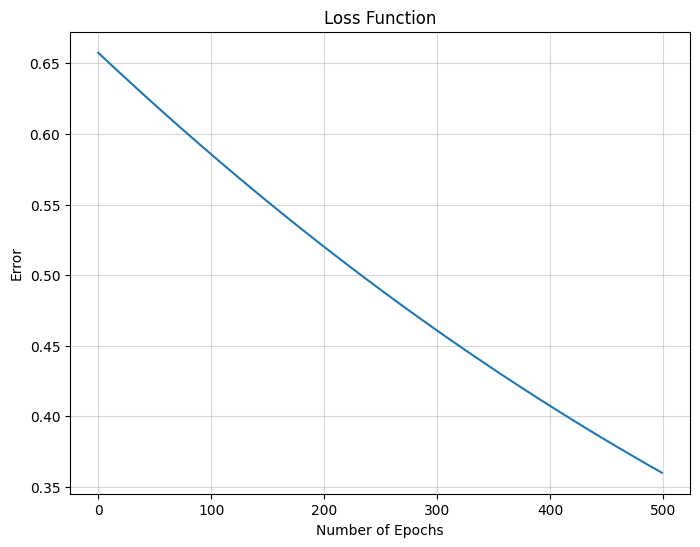

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

### **Evaluation**

In [35]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

0.8875

In [36]:
y_hat[:, 0], y_test

(array([0.25589298, 0.1619215 , 0.38433035, 0.80156119, 0.30288349,
        0.51128738, 0.8177491 , 0.22372106, 0.48667563, 0.62704309,
        0.4084109 , 0.3590595 , 0.72589755, 0.34825442, 0.73238564,
        0.60770422, 0.66514585, 0.50999012, 0.62687108, 0.13479934,
        0.68941534, 0.79007094, 0.68054466, 0.22081414, 0.14295146,
        0.63128026, 0.29303052, 0.85761546, 0.62086896, 0.69985395,
        0.51477041, 0.2750142 , 0.39250137, 0.28832987, 0.83431322,
        0.39687838, 0.67810537, 0.66298665, 0.53833731, 0.45887734,
        0.32902226, 0.80733601, 0.787724  , 0.73410125, 0.75153968,
        0.78729911, 0.22364943, 0.41202663, 0.11784421, 0.23995386,
        0.62297647, 0.33485809, 0.41946754, 0.90007471, 0.57549514,
        0.15499816, 0.69122696, 0.29785231, 0.83040207, 0.13107457,
        0.8361736 , 0.47260245, 0.5701073 , 0.49364259, 0.87485099,
        0.33270787, 0.8522786 , 0.71460183, 0.32945586, 0.32234846,
        0.86766188, 0.6395426 , 0.20967514, 0.47

### **Plot**

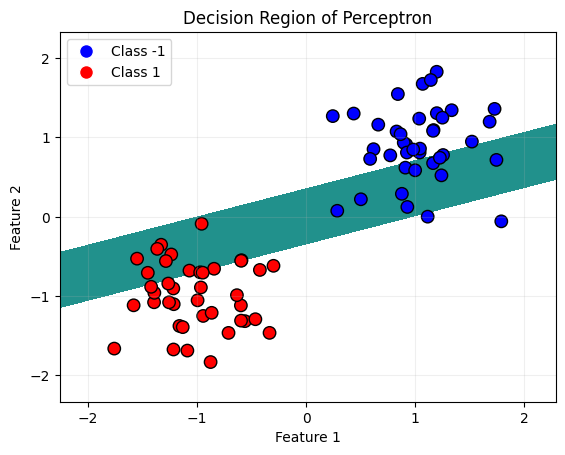

In [37]:
# Define the range of values for x1 and x2
x1_min, x2_min = X_test.min(0) - 0.5
x1_max, x2_max = X_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()

## **changing bias to -0.1**

In [38]:
neuron = Neuron(in_features=2, threshold=-0.1, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(X_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')

Iter=0, Loss=0.8146
Iter=10, Loss=0.9309
Iter=20, Loss=1.057
Iter=30, Loss=1.193
Iter=40, Loss=1.338
Iter=50, Loss=1.491
Iter=60, Loss=1.651
Iter=70, Loss=1.817
Iter=80, Loss=1.989
Iter=90, Loss=2.165
Iter=100, Loss=2.346
Iter=110, Loss=2.53
Iter=120, Loss=2.717
Iter=130, Loss=2.906
Iter=140, Loss=3.098
Iter=150, Loss=3.291
Iter=160, Loss=3.486
Iter=170, Loss=3.682
Iter=180, Loss=3.879
Iter=190, Loss=4.077
Iter=200, Loss=4.275
Iter=210, Loss=4.475
Iter=220, Loss=4.674
Iter=230, Loss=4.874
Iter=240, Loss=5.075
Iter=250, Loss=5.276
Iter=260, Loss=5.477
Iter=270, Loss=5.679
Iter=280, Loss=5.88
Iter=290, Loss=6.082
Iter=300, Loss=6.284
Iter=310, Loss=6.486
Iter=320, Loss=6.688
Iter=330, Loss=6.89
Iter=340, Loss=7.092
Iter=350, Loss=7.295
Iter=360, Loss=7.497
Iter=370, Loss=7.7
Iter=380, Loss=7.902
Iter=390, Loss=8.105
Iter=400, Loss=8.307
Iter=410, Loss=8.51
Iter=420, Loss=8.713
Iter=430, Loss=8.915
Iter=440, Loss=9.118
Iter=450, Loss=9.321
Iter=460, Loss=9.524
Iter=470, Loss=9.726
Iter=48

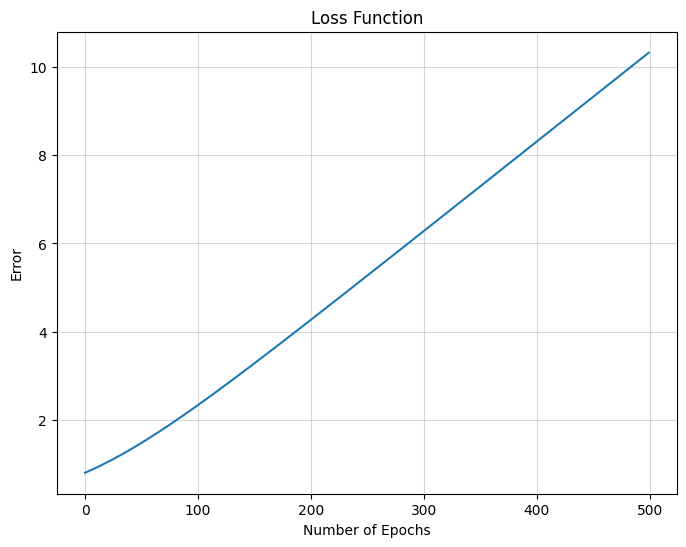

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

### **Evaluation**

In [40]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

0.0

In [41]:
y_hat[:, 0], y_test

(array([9.99999783e-01, 9.99916173e-01, 9.99949967e-01, 1.91298420e-06,
        9.99899098e-01, 8.30042217e-01, 2.69616058e-08, 9.99991065e-01,
        9.66909133e-01, 5.08271354e-04, 9.99864679e-01, 9.99994080e-01,
        7.53150032e-06, 9.99893989e-01, 9.99358790e-01, 1.66412449e-04,
        2.35488849e-05, 9.95551309e-01, 2.25134764e-04, 9.99999395e-01,
        7.60711019e-05, 1.02847376e-05, 2.88951633e-03, 9.99997038e-01,
        9.99996563e-01, 2.42977170e-04, 9.99903430e-01, 2.67679174e-07,
        2.83470321e-03, 3.96549634e-06, 2.63568665e-04, 9.99988308e-01,
        9.99930656e-01, 9.99478911e-01, 3.70481466e-05, 9.99431865e-01,
        6.70373253e-03, 8.02715014e-06, 1.31457049e-04, 3.59487868e-04,
        9.99578930e-01, 2.00071067e-06, 1.00280913e-04, 2.59570190e-05,
        1.81528935e-04, 1.81486547e-05, 9.99998679e-01, 8.36587896e-03,
        9.99999858e-01, 9.99996699e-01, 2.68293987e-03, 9.99823904e-01,
        9.99532879e-01, 4.66437396e-07, 9.90642722e-01, 9.997673

### **Plot**

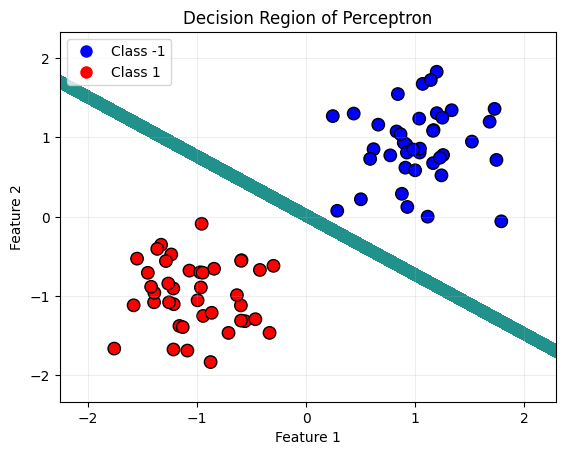

In [42]:
# Define the range of values for x1 and x2
x1_min, x2_min = X_test.min(0) - 0.5
x1_max, x2_max = X_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()

## **bias elemination**

In [28]:
neuron = Neuron(in_features=2, threshold=0, af=sigmoid, loss_fn=bce, n_iter=500, eta=0.1, verbose=True)
neuron.fit(X_train, y_train[:, None])
print(f'Neuron specification: {neuron}')
print(f'Neuron parameters: {neuron.parameters()}')

Iter=0, Loss=0.2404
Iter=10, Loss=0.2404
Iter=20, Loss=0.2404
Iter=30, Loss=0.2404
Iter=40, Loss=0.2404
Iter=50, Loss=0.2404
Iter=60, Loss=0.2404
Iter=70, Loss=0.2404
Iter=80, Loss=0.2404
Iter=90, Loss=0.2404
Iter=100, Loss=0.2404
Iter=110, Loss=0.2404
Iter=120, Loss=0.2404
Iter=130, Loss=0.2404
Iter=140, Loss=0.2404
Iter=150, Loss=0.2404
Iter=160, Loss=0.2404
Iter=170, Loss=0.2404
Iter=180, Loss=0.2404
Iter=190, Loss=0.2404
Iter=200, Loss=0.2404
Iter=210, Loss=0.2404
Iter=220, Loss=0.2404
Iter=230, Loss=0.2404
Iter=240, Loss=0.2404
Iter=250, Loss=0.2404
Iter=260, Loss=0.2404
Iter=270, Loss=0.2404
Iter=280, Loss=0.2404
Iter=290, Loss=0.2404
Iter=300, Loss=0.2404
Iter=310, Loss=0.2404
Iter=320, Loss=0.2404
Iter=330, Loss=0.2404
Iter=340, Loss=0.2404
Iter=350, Loss=0.2404
Iter=360, Loss=0.2404
Iter=370, Loss=0.2404
Iter=380, Loss=0.2404
Iter=390, Loss=0.2404
Iter=400, Loss=0.2404
Iter=410, Loss=0.2404
Iter=420, Loss=0.2404
Iter=430, Loss=0.2404
Iter=440, Loss=0.2404
Iter=450, Loss=0.2404

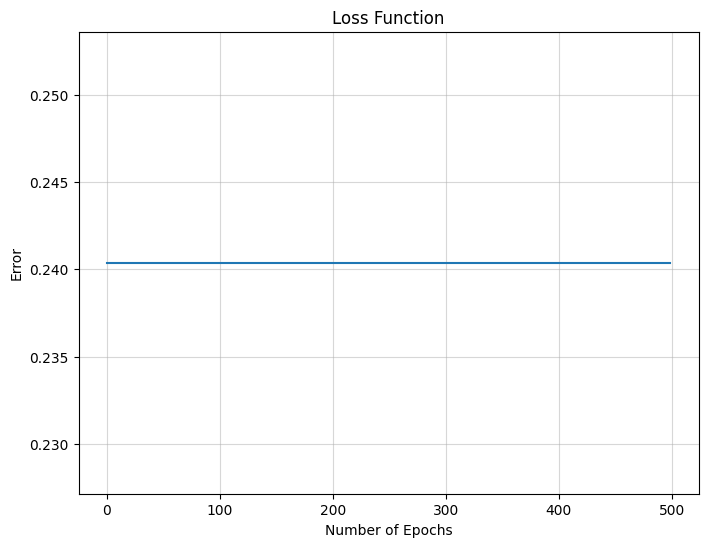

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(neuron.loss_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

### **Evaluation**

In [30]:
y_hat = neuron.predict(X_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [31]:
y_hat[:, 0], y_test

(array([0.10625508, 0.2618469 , 0.19175446, 0.84165421, 0.22630745,
        0.43173362, 0.90976063, 0.18282737, 0.37084889, 0.73778187,
        0.21247759, 0.14880757, 0.82794672, 0.2178571 , 0.19106774,
        0.77420237, 0.81320983, 0.29449562, 0.76179084, 0.14787464,
        0.77842863, 0.8062733 , 0.66741208, 0.1589614 , 0.18280385,
        0.75866491, 0.22736251, 0.86643542, 0.68386054, 0.84640693,
        0.77966374, 0.17793947, 0.1983174 , 0.27840404, 0.75861054,
        0.2550842 , 0.63804418, 0.83788466, 0.79363987, 0.78182443,
        0.26150736, 0.83936279, 0.74505308, 0.79665865, 0.73793123,
        0.79271885, 0.14219328, 0.69706507, 0.12603769, 0.15728514,
        0.68520041, 0.23465345, 0.24452308, 0.84189657, 0.30394438,
        0.29693427, 0.86770531, 0.11833324, 0.76333005, 0.13728047,
        0.74146856, 0.21532474, 0.82645655, 0.8247554 , 0.73811722,
        0.21309246, 0.79346295, 0.83115209, 0.22279092, 0.29666332,
        0.8547301 , 0.81406946, 0.24070246, 0.79

### **Plot**

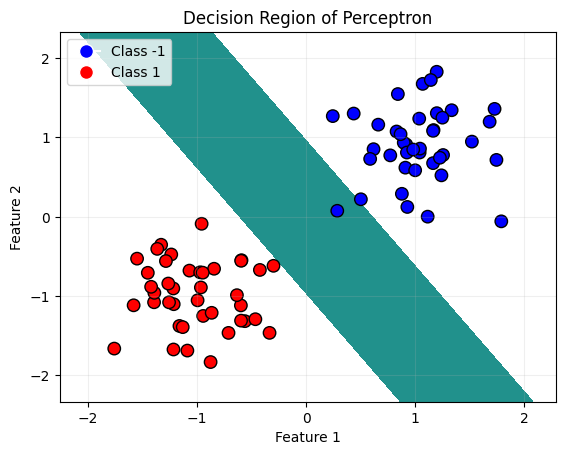

In [32]:
# Define the range of values for x1 and x2
x1_min, x2_min = X_test.min(0) - 0.5
x1_max, x2_max = X_test.max(0) + 0.5

# Generate a meshgrid of points
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)

# Flatten the meshgrid points and predict the class labels
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = neuron.decision_function(xm)  # Use decision_function instead of predict

# Plot the decision region
plt.contourf(x1m, x2m, ym.reshape(x1m.shape), levels=[-0.5, 0.5])

# Scatter plot for the test data with different markers
colors = np.array(['blue', 'red'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors[y_test], edgecolors='k', marker='o', s=80, linewidth=1, label='Test Data')

# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Perceptron')
plt.legend()
plt.grid(alpha=0.2)  # Display grid lines

# Add legend for class -1 and class 1
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class -1'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')]
plt.legend(handles=legend_elements, loc='upper left')

# Show the plot
plt.show()